In [ ]:
import zipfile
import os

# Extract frames.zip
with zipfile.ZipFile('/content/frames.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/frames')

# Extract lane-masks.zip
with zipfile.ZipFile('/content/lane-masks.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/lane-masks')

# Verify extraction
print("Frames directory contents:", os.listdir('/content/frames')[:5])
print("Lane-masks directory contents:", os.listdir('/content/lane-masks')[:5])

Frames directory contents: ['frames']
Lane-masks directory contents: ['lane-masks']


In [ ]:
import os

# Check contents of the extracted folders
print("Frames subdirectory contents:", os.listdir('/content/frames'))
print("Lane-masks subdirectory contents:", os.listdir('/content/lane-masks'))


Frames subdirectory contents: ['frames']
Lane-masks subdirectory contents: ['lane-masks']


In [ ]:
image_dir = '/content/frames/frames'
mask_dir = '/content/lane-masks/lane-masks'


In [ ]:
print("Actual frames contents:", os.listdir(image_dir)[:5])
print("Actual lane-masks contents:", os.listdir(mask_dir)[:5])


Actual frames contents: ['0313-2_29400.jpg', '0313-2_975.jpg', '0313-1_7240.jpg', '0531_1492638387249489975.jpg', '0313-1_10760.jpg']
Actual lane-masks contents: ['0313-2_29400.jpg', '0313-2_975.jpg', '0313-1_7240.jpg', '0531_1492638387249489975.jpg', '0313-1_10760.jpg']


In [ ]:
import cv2
import os
import numpy as np

def load_data(image_dir, mask_dir, target_size=(256, 256)):
    images, masks = [], []
    for img_name in sorted(os.listdir(image_dir)):
        img_path = os.path.join(image_dir, img_name)
        mask_path = os.path.join(mask_dir, img_name)

        # Load image and mask
        image = cv2.imread(img_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Skip if any image or mask is not loaded correctly
        if image is None or mask is None:
            print(f"Skipping {img_name} due to loading issue.")
            continue

        # Resize image and mask
        image = cv2.resize(image, target_size)
        mask = cv2.resize(mask, target_size)

        # Normalize image and binarize mask
        image = image / 255.0
        mask = (mask > 128).astype(np.float32)  # Binarize mask

        images.append(image)
        masks.append(mask[..., np.newaxis])  # Add channel dimension

    return np.array(images), np.array(masks)


In [ ]:
image_dir = '/content/frames'
mask_dir = '/content/lane-masks/lane-masks'


In [ ]:
images, masks = load_data(image_dir, mask_dir)
print(f"Loaded {len(images)} images and {len(masks)} masks.")


Skipping frames due to loading issue.
Loaded 0 images and 0 masks.


In [ ]:
import os

print(f"Image Directory: {image_dir}")
print(f"Mask Directory: {mask_dir}")
print(f"Contents of Image Directory: {os.listdir(image_dir)[:5]}")
print(f"Contents of Mask Directory: {os.listdir(mask_dir)[:5]}")


Image Directory: /content/frames
Mask Directory: /content/lane-masks/lane-masks
Contents of Image Directory: ['frames']
Contents of Mask Directory: ['0313-2_29400.jpg', '0313-2_975.jpg', '0313-1_7240.jpg', '0531_1492638387249489975.jpg', '0313-1_10760.jpg']


In [ ]:
for img_name in sorted(os.listdir(image_dir)):
    if not img_name.endswith(('.jpg', '.png')):  # Adjust for your dataset
        print(f"Skipping file {img_name} due to unsupported extension.")
        continue


Skipping file frames due to unsupported extension.


In [ ]:
image_dir = '/content/frames/frames'  # Correct the directory path


In [ ]:
print(f"Contents of Image Directory: {os.listdir(image_dir)[:5]}")


Contents of Image Directory: ['0313-2_29400.jpg', '0313-2_975.jpg', '0313-1_7240.jpg', '0531_1492638387249489975.jpg', '0313-1_10760.jpg']


In [ ]:
images, masks = load_data(image_dir, mask_dir)
print(f"Loaded {len(images)} images and {len(masks)} masks.")


Loaded 3626 images and 3626 masks.


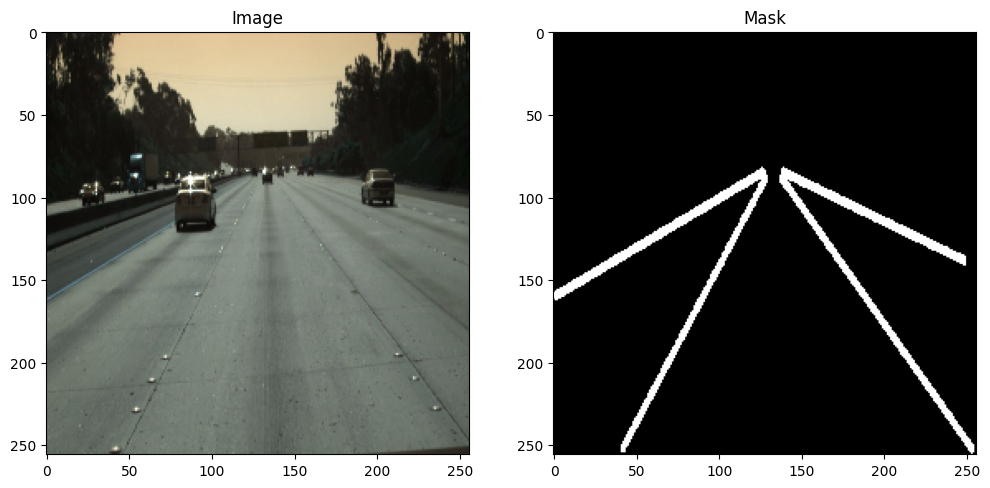

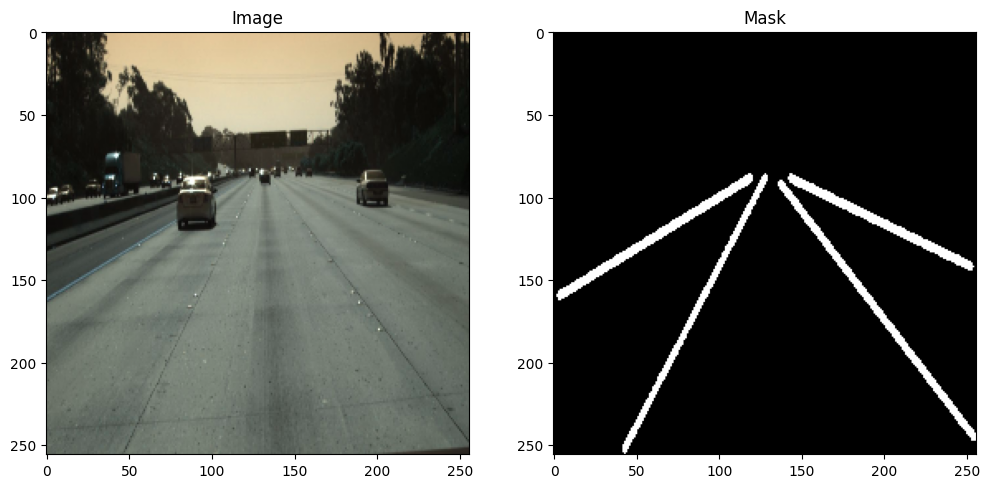

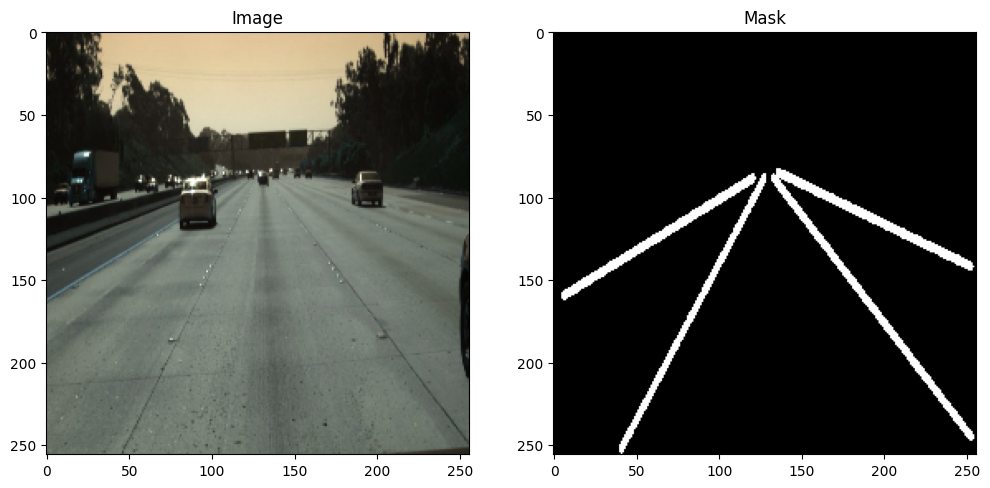

Image Shape: (256, 256, 3)
Mask Shape: (256, 256, 1)


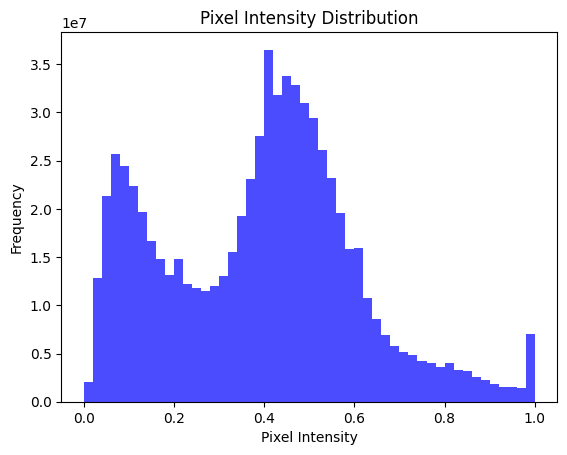

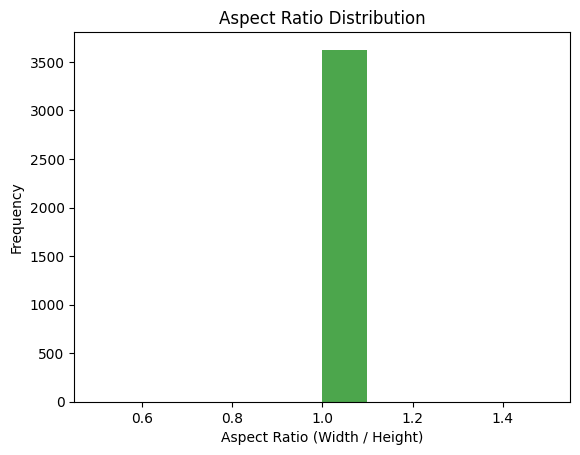

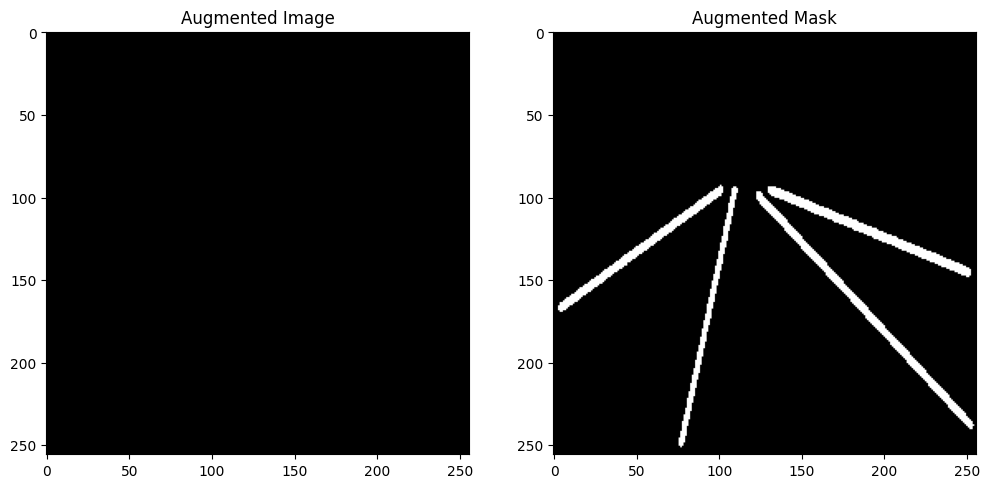

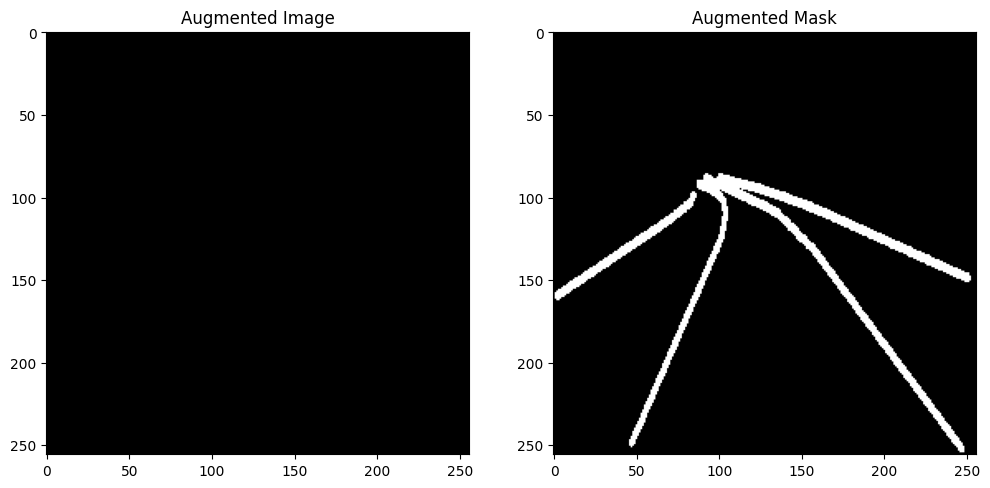

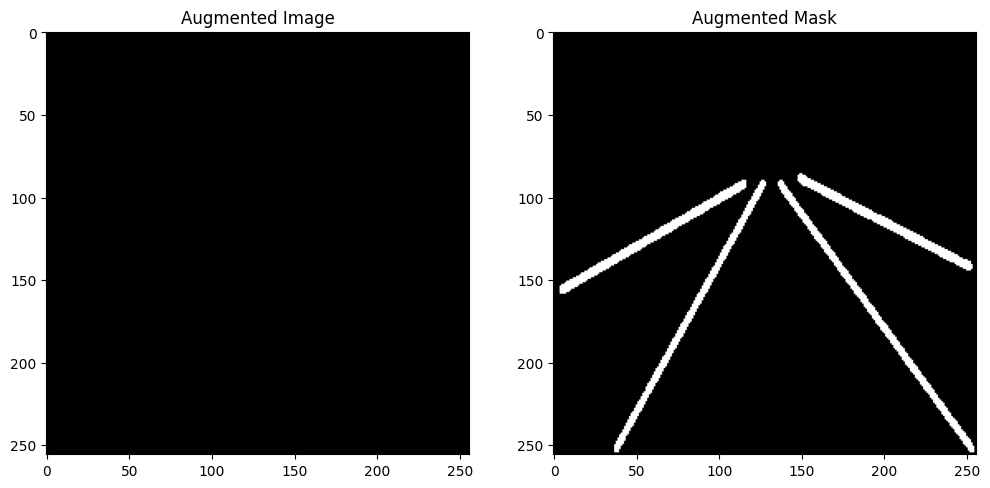

Image Range: Min=0.0, Max=0.00392156862745098
Mask Range: Min=0.0, Max=1.0


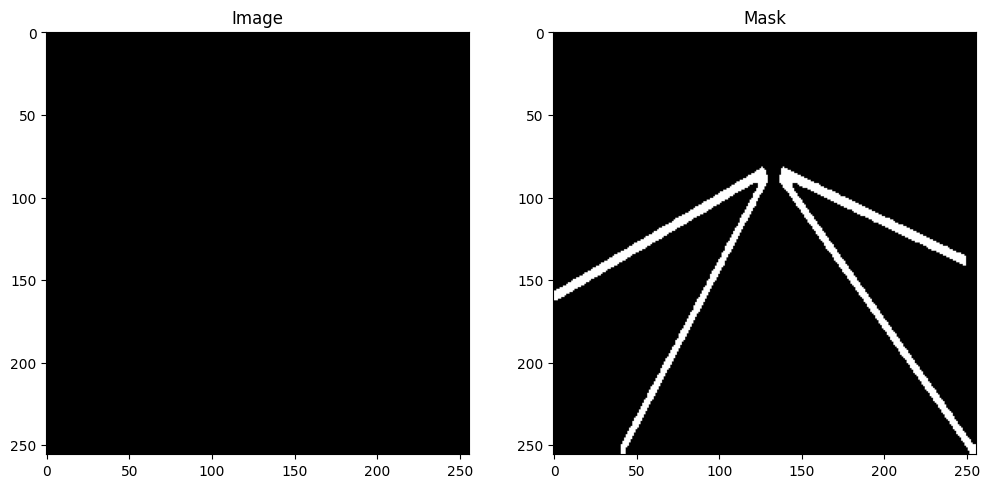

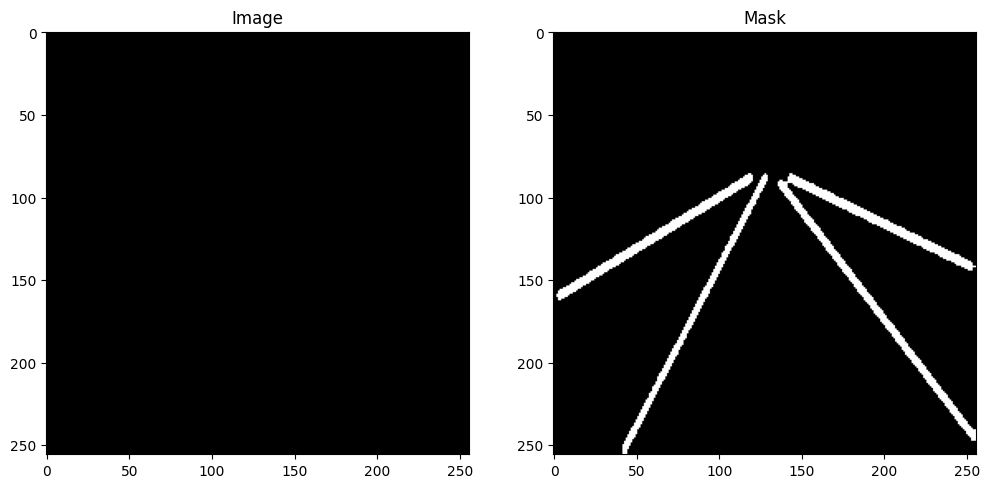

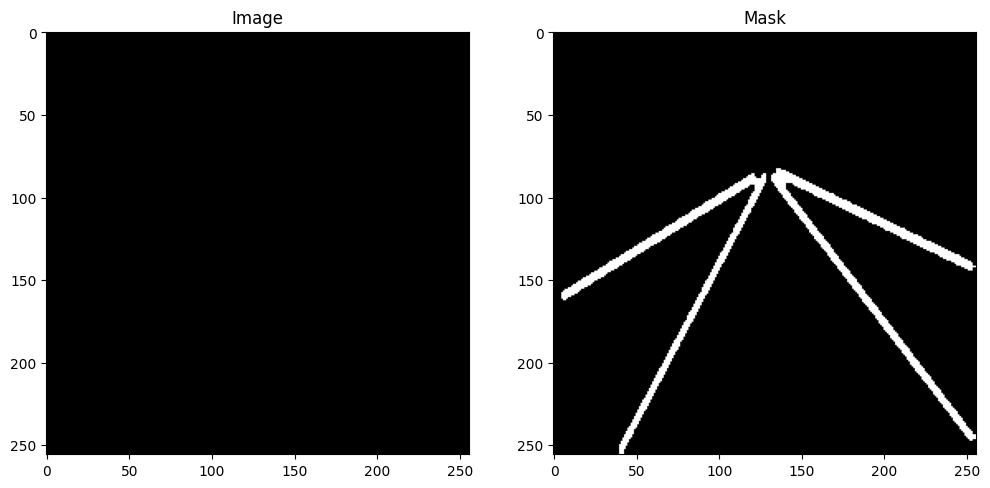

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Function to visualize images and masks
def visualize_samples(images, masks, num_samples=3):
    for i in range(num_samples):
        plt.figure(figsize=(12, 6))

        # Display the image
        plt.subplot(1, 2, 1)
        plt.title("Image")
        plt.imshow(images[i])

        # Display the corresponding mask
        plt.subplot(1, 2, 2)
        plt.title("Mask")
        plt.imshow(masks[i].squeeze(), cmap='gray')

        plt.show()

# Visualize a few samples
visualize_samples(images, masks)

# Analyze image shapes
print(f"Image Shape: {images[0].shape}")
print(f"Mask Shape: {masks[0].shape}")

# Pixel intensity distribution of images
def pixel_intensity_distribution(images):
    intensities = images.flatten()
    plt.hist(intensities, bins=50, color='blue', alpha=0.7)
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

pixel_intensity_distribution(images)

# Aspect ratio analysis of images
def aspect_ratio_analysis(images):
    aspect_ratios = [img.shape[1] / img.shape[0] for img in images]
    plt.hist(aspect_ratios, bins=10, color='green', alpha=0.7)
    plt.title("Aspect Ratio Distribution")
    plt.xlabel("Aspect Ratio (Width / Height)")
    plt.ylabel("Frequency")
    plt.show()

aspect_ratio_analysis(images)

# Data augmentation for variability
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images slightly
    width_shift_range=0.1,  # Horizontal shifts
    height_shift_range=0.1,  # Vertical shifts
    brightness_range=[0.8, 1.2],  # Brightness adjustment
    horizontal_flip=True,  # Flip horizontally
    fill_mode='nearest'
)

# Apply data augmentation and visualize
def augment_data(images, masks, datagen, num_samples=3):
    for i in range(num_samples):
        plt.figure(figsize=(12, 6))
        augmented = datagen.flow(images, masks, batch_size=1)
        aug_img, aug_mask = next(augmented)

        # Display augmented image
        plt.subplot(1, 2, 1)
        plt.title("Augmented Image")
        plt.imshow(aug_img[0])

        # Display augmented mask
        plt.subplot(1, 2, 2)
        plt.title("Augmented Mask")
        plt.imshow(aug_mask[0].squeeze(), cmap='gray')

        plt.show()

augment_data(images, masks, datagen)

# Normalize images and preprocess masks
def normalize_and_preprocess(images, masks):
    # Normalize image pixel values
    images = images / 255.0

    # Binarize masks if not already binary
    masks = (masks > 0.5).astype(np.float32)

    return images, masks

images, masks = normalize_and_preprocess(images, masks)

# Verify preprocessing
print(f"Image Range: Min={images.min()}, Max={images.max()}")
print(f"Mask Range: Min={masks.min()}, Max={masks.max()}")

# Post-process masks (optional smoothing or filling)
def post_process_masks(masks):
    kernel = np.ones((3, 3), np.uint8)
    processed_masks = []
    for mask in masks:
        processed_mask = cv2.morphologyEx(mask.squeeze(), cv2.MORPH_CLOSE, kernel)  # Close small gaps
        processed_masks.append(processed_mask[..., np.newaxis])  # Add channel dimension back
    return np.array(processed_masks)

masks = post_process_masks(masks)

# Visualize post-processed masks
visualize_samples(images, masks)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define U-Net architecture
def unet_model(input_shape=(256, 256, 3)):
    inputs = Input(input_shape)

    # Encoder (Downsampling)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder (Upsampling)
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs, outputs)
    return model

# Compile the model
unet = unet_model(input_shape=(256, 256, 3))
unet.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Split the preprocessed data into training and validation sets
from sklearn.model_selection import train_test_split
train_images, val_images, train_masks, val_masks = train_test_split(
    images, masks, test_size=0.2, random_state=42
)

# Train the model
history = unet.fit(
    train_images, train_masks,
    validation_data=(val_images, val_masks),
    batch_size=16,
    epochs=20
)

# Evaluate the model
val_loss, val_accuracy = unet.evaluate(val_images, val_masks)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


Epoch 1/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 74s 208ms/step - accuracy: 0.9544 - loss: 0.3852 - val_accuracy: 0.9572 - val_loss: 0.1506
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9572 - loss: 0.1462 - val_accuracy: 0.9572 - val_loss: 0.1335
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9570 - loss: 0.1309 - val_accuracy: 0.9572 - val_loss: 0.1192
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9577 - loss: 0.1162 - val_accuracy: 0.9591 - val_loss: 0.1050
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9606 - loss: 0.1009 - val_accuracy: 0.9643 - val_loss: 0.0890
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9648 - loss: 0.0861 - val_accuracy: 0.9668 - val_loss: 0.0805
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9679 - loss: 0.0772 - val_accuracy: 0.9696 - val_loss: 0.0726
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9713 - loss: 0.0681 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


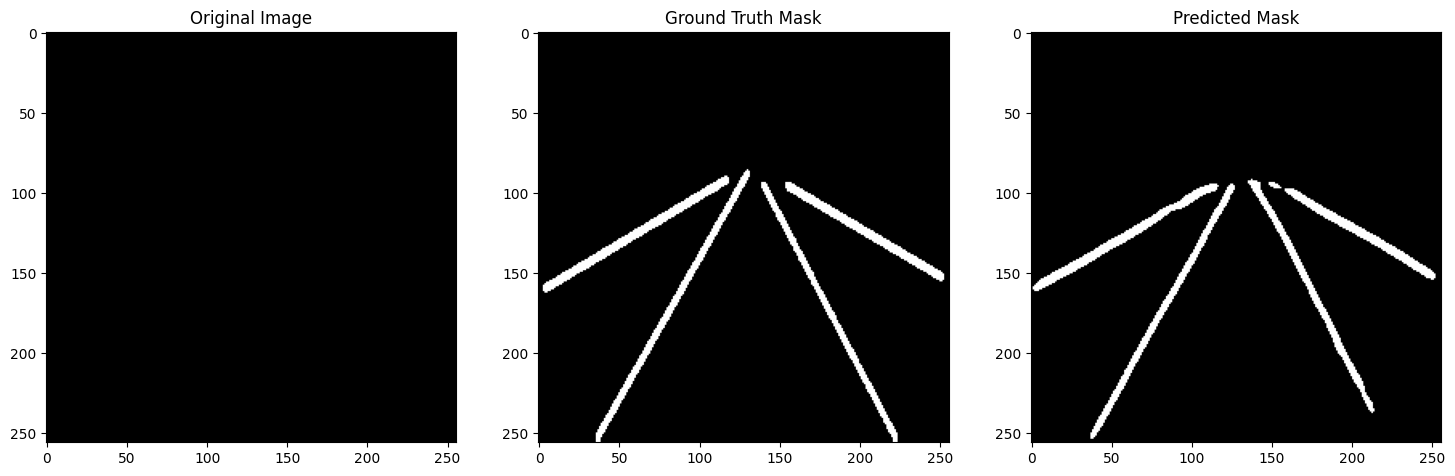

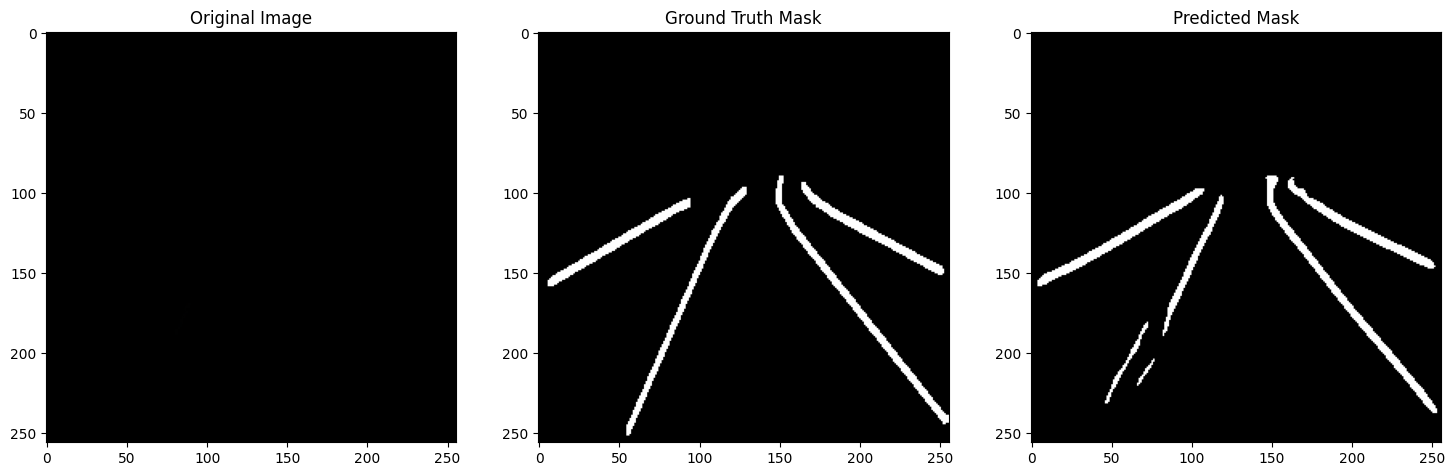

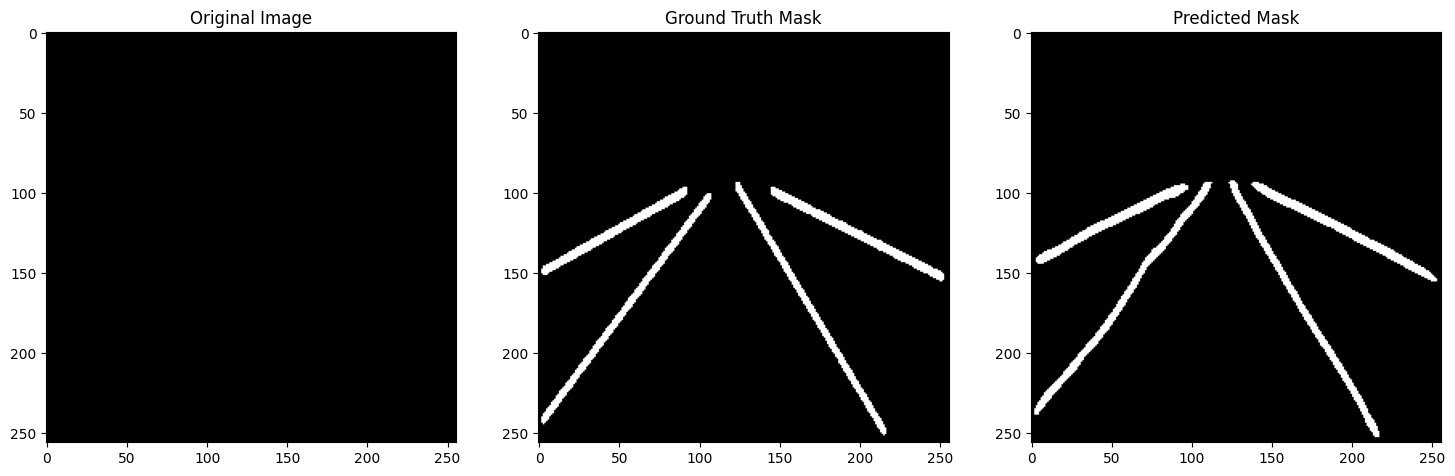

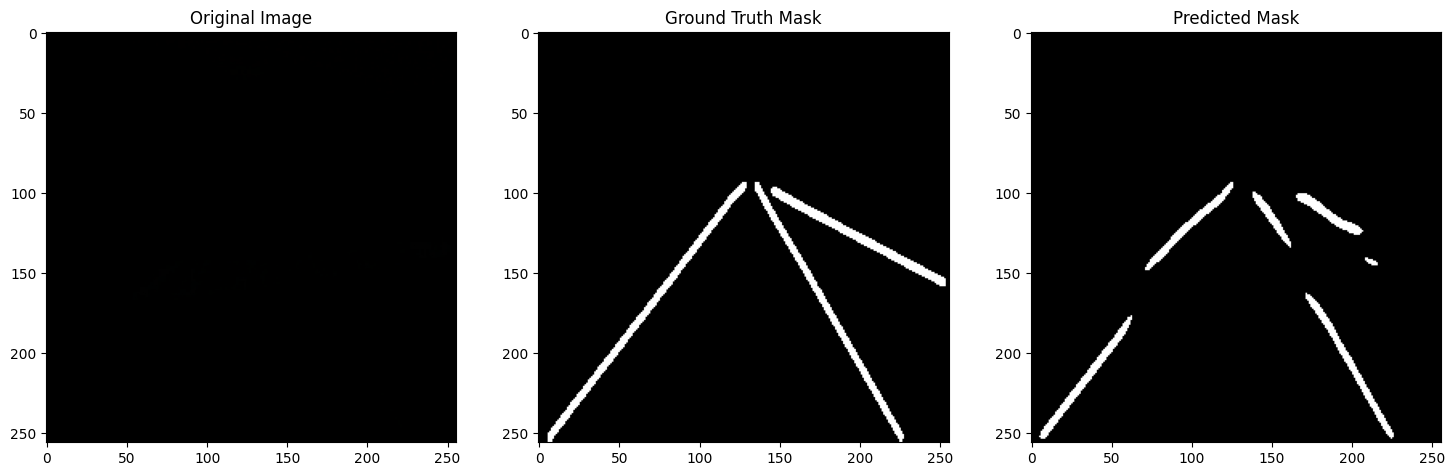

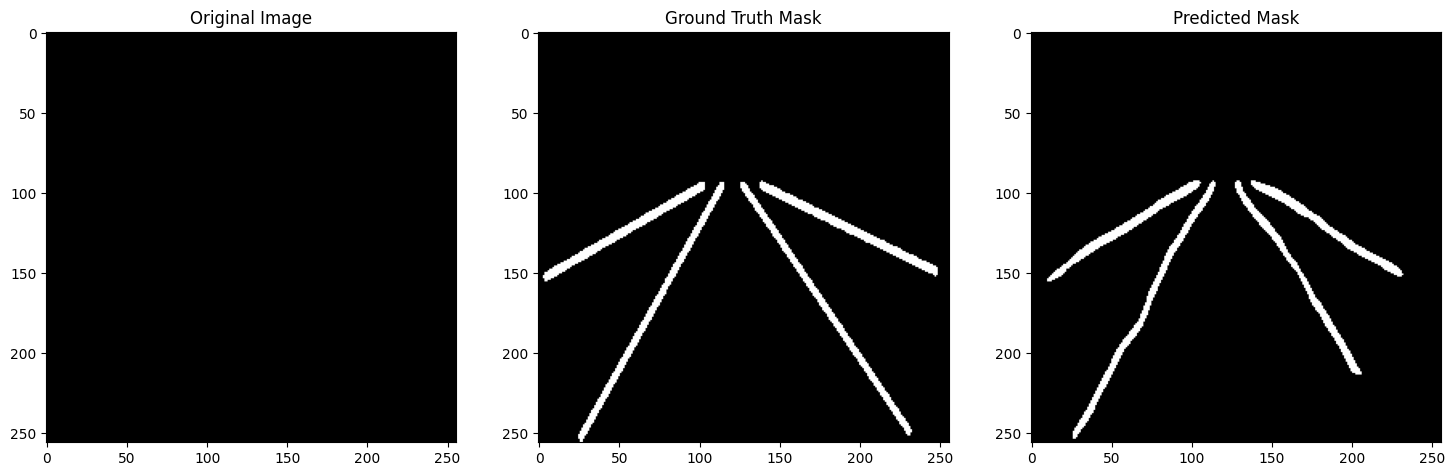

In [ ]:
# Predict on validation images
preds = unet.predict(val_images[:5])  # Predict first 5 validation images
preds = (preds > 0.5).astype(np.float32)  # Binarize predictions

# Plot original images, ground truth masks, and predictions
for i in range(5):
    plt.figure(figsize=(18, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(val_images[i])

    # Ground truth mask
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth Mask")
    plt.imshow(val_masks[i].squeeze(), cmap='gray')

    # Predicted mask
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(preds[i].squeeze(), cmap='gray')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


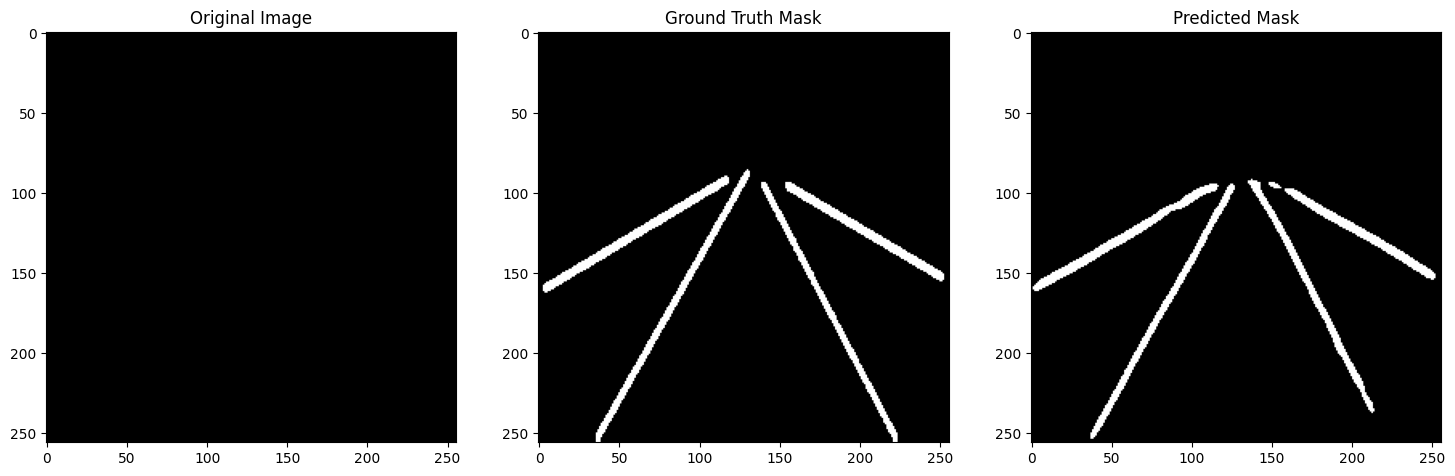

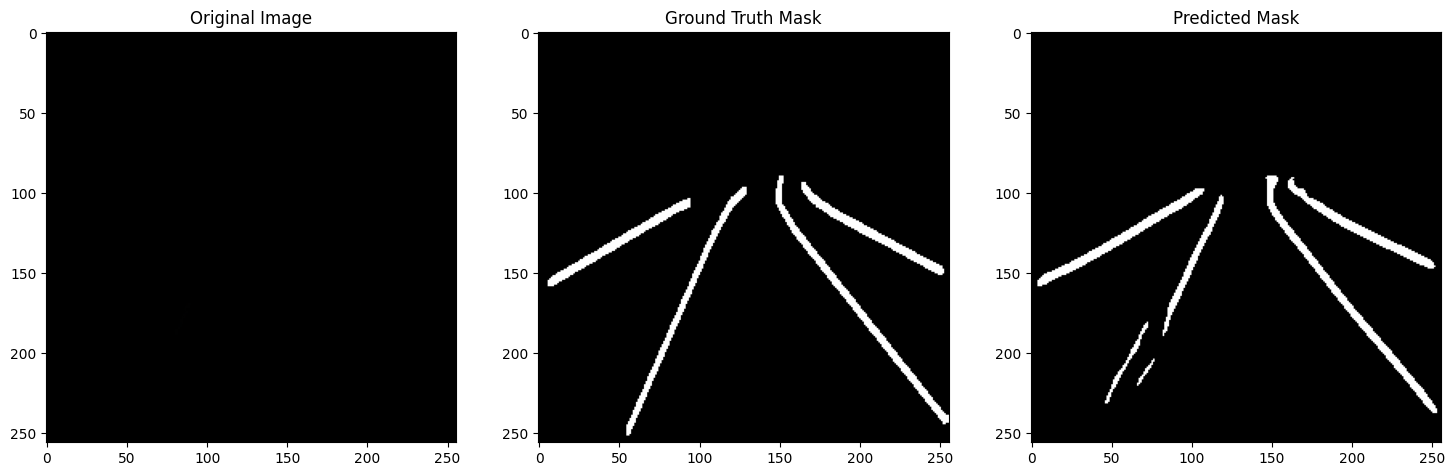

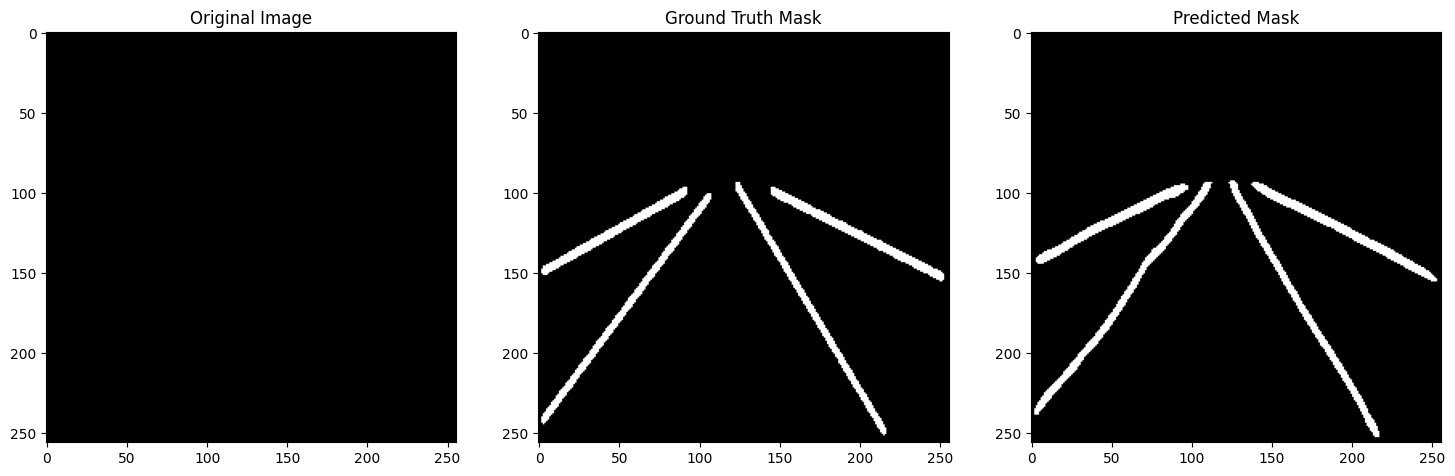

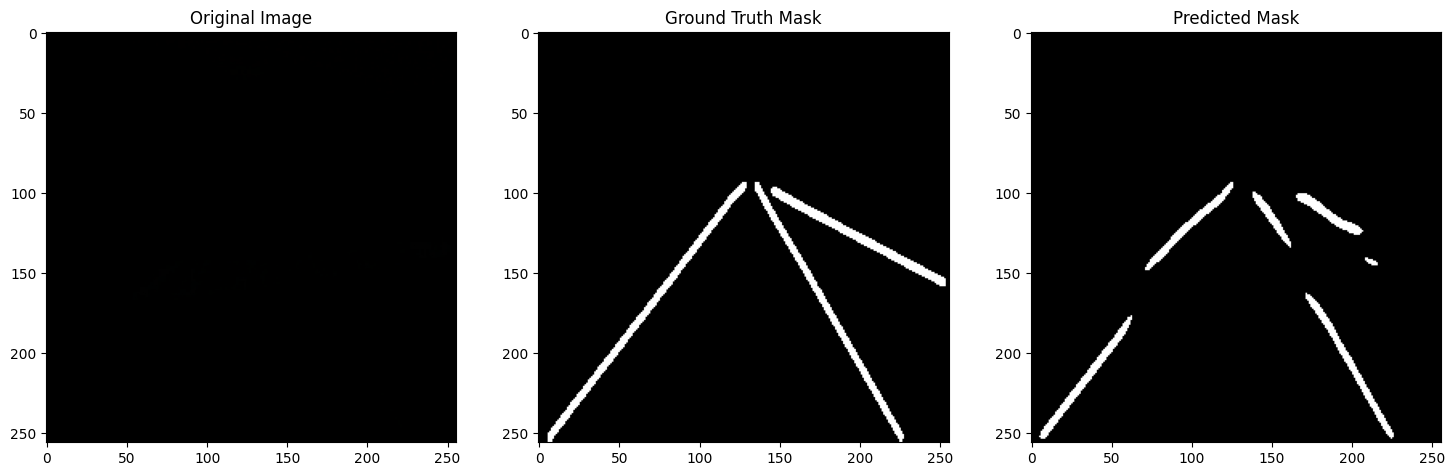

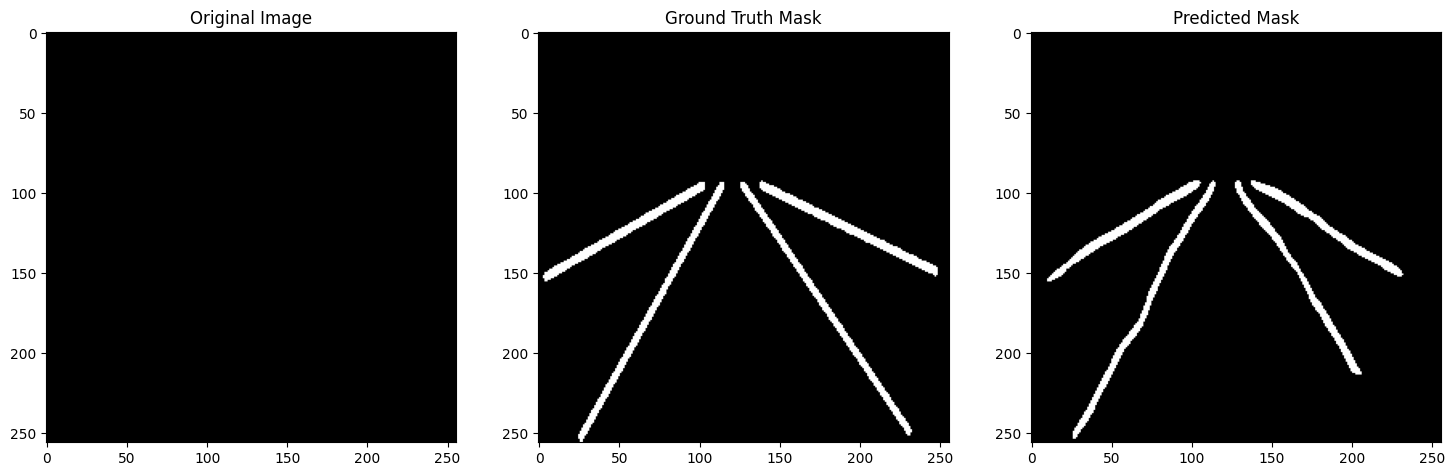

In [ ]:
# Predict on validation images
preds = unet.predict(val_images[:5])  # Predict first 5 validation images
preds = (preds > 0.5).astype(np.float32)  # Binarize predictions

# Plot original images, ground truth masks, and predictions
for i in range(5):
    plt.figure(figsize=(18, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(val_images[i])

    # Ground truth mask
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth Mask")
    plt.imshow(val_masks[i].squeeze(), cmap='gray')

    # Predicted mask
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(preds[i].squeeze(), cmap='gray')

    plt.show()


In [ ]:
print(f"Image Min Value: {val_images[0].min()}, Max Value: {val_images[0].max()}")
print(f"Image Shape: {val_images[0].shape}")
print(val_images[0])


Image Min Value: 4.61361014994233e-05, Max Value: 0.00392156862745098
Image Shape: (256, 256, 3)
[[[0.0033218  0.00270665 0.00241446]
  [0.00284506 0.00224529 0.0016609 ]
  [0.00342945 0.00275279 0.00202999]
  ...
  [0.00027682 0.00024606 0.00023068]
  [0.00024606 0.0002153  0.00019992]
  [0.00023068 0.00019992 0.00018454]]

 [[0.00301423 0.00247597 0.00198385]
  [0.00318339 0.00262976 0.00198385]
  [0.00324491 0.00262976 0.00193772]
  ...
  [0.00026144 0.00024606 0.00018454]
  [0.0002922  0.00027682 0.0002153 ]
  [0.0002153  0.00019992 0.00013841]]

 [[0.00313725 0.00261438 0.00196847]
  [0.00313725 0.00262976 0.00193772]
  [0.00322953 0.00273741 0.00201461]
  ...
  [0.00030757 0.00026144 0.00019992]
  [0.00039985 0.00036909 0.0002922 ]
  [0.0002922  0.00026144 0.00018454]]

 ...

 [[0.00129181 0.00138408 0.00124567]
  [0.00129181 0.0013687  0.0012303 ]
  [0.00124567 0.00132257 0.00118416]
  ...
  [0.00058439 0.00044598 0.00038447]
  [0.00058439 0.00044598 0.00038447]
  [0.00058439 0.

Original Image Min Value: 5, Max Value: 255


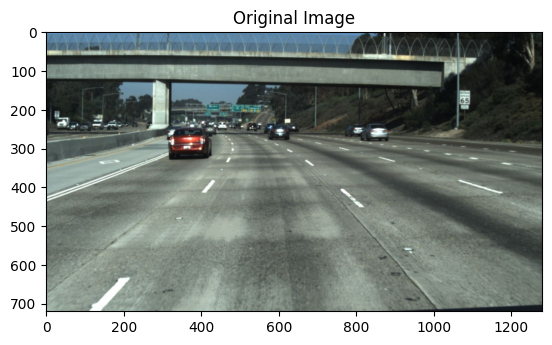

In [ ]:
# Load and visualize the original image without normalization
original_image_path = os.path.join(image_dir, os.listdir(image_dir)[0])
original_image = cv2.imread(original_image_path)
print(f"Original Image Min Value: {original_image.min()}, Max Value: {original_image.max()}")
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.show()


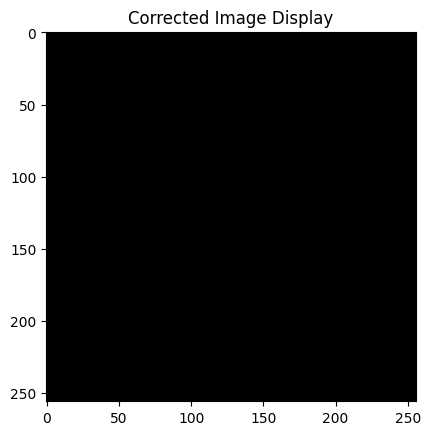

In [ ]:
# Ensure the image is in the correct format
plt.imshow(val_images[0][:, :, ::-1])  # Reverse channel order if needed (BGR -> RGB)
plt.title("Corrected Image Display")
plt.show()


In [ ]:
def normalize_and_preprocess(images, masks):
    images = images / 255.0  # Ensure normalization to [0, 1]
    masks = (masks > 0.5).astype(np.float32)  # Binarize masks
    print(f"After Preprocessing - Image Min: {images[0].min()}, Max: {images[0].max()}")
    return images, masks

images, masks = normalize_and_preprocess(images, masks)


After Preprocessing - Image Min: 2.412345176440434e-07, Max: 1.5378700499807765e-05


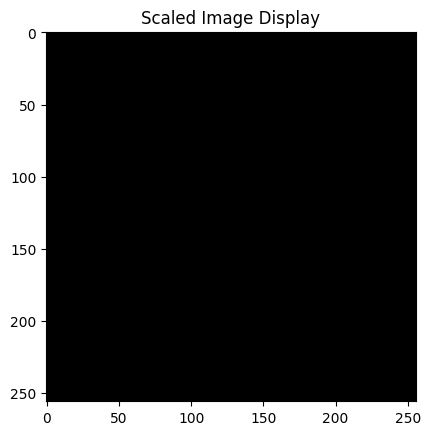

In [ ]:
plt.imshow(val_images[0], cmap='gray', vmin=0, vmax=1)  # Explicitly set vmin and vmax
plt.title("Scaled Image Display")
plt.show()


In [ ]:
def normalize_and_preprocess_fixed(images, masks):
    # Ensure proper normalization
    images = images.astype(np.float32) / 255.0  # Normalize between [0, 1]

    # Ensure masks are binary (0 or 1)
    masks = (masks > 0.5).astype(np.float32)

    # Debug normalized values
    print(f"Fixed Preprocessing - Image Min: {images[0].min()}, Max: {images[0].max()}")
    return images, masks

images, masks = normalize_and_preprocess_fixed(images, masks)


Fixed Preprocessing - Image Min: 9.46017708614022e-10, Max: 6.030862920169966e-08


Fixed Image Min: 9.46017708614022e-10, Max: 6.030862920169966e-08


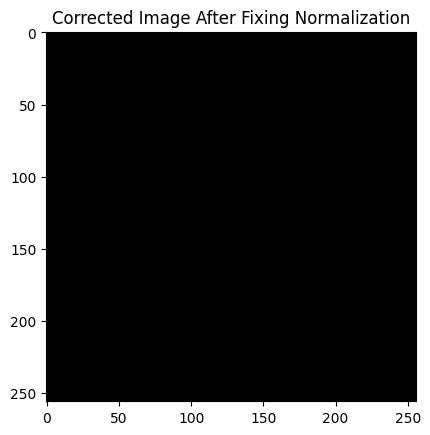

In [ ]:
# Check the pixel values after fixing normalization
print(f"Fixed Image Min: {images[0].min()}, Max: {images[0].max()}")

# Visualize fixed image
plt.imshow(images[0])
plt.title("Corrected Image After Fixing Normalization")
plt.show()


In [ ]:
def preprocess_debug(images, masks, target_size=(256, 256)):
    preprocessed_images = []
    preprocessed_masks = []

    for i, (img, mask) in enumerate(zip(images, masks)):
        # Debug raw input values
        print(f"Original Image {i} - Min: {img.min()}, Max: {img.max()}")
        print(f"Original Mask {i} - Unique Values: {np.unique(mask)}")

        # Resize images and masks
        img_resized = cv2.resize(img, target_size)
        mask_resized = cv2.resize(mask, target_size)

        # Normalize image
        img_resized = img_resized.astype(np.float32) / 255.0
        mask_resized = (mask_resized > 0.5).astype(np.float32)  # Binarize masks

        # Debug processed values
        print(f"Processed Image {i} - Min: {img_resized.min()}, Max: {img_resized.max()}")
        print(f"Processed Mask {i} - Unique Values: {np.unique(mask_resized)}")

        preprocessed_images.append(img_resized)
        preprocessed_masks.append(mask_resized)

    return np.array(preprocessed_images), np.array(preprocessed_masks)

images, masks = preprocess_debug(images, masks)


Streaming output truncated to the last 5000 lines.
Original Image 2376 - Min: 0.0, Max: 6.030862920169966e-08
Original Mask 2376 - Unique Values: [0. 1.]
Processed Image 2376 - Min: 0.0, Max: 2.365044271535055e-10
Processed Mask 2376 - Unique Values: [0. 1.]
Original Image 2377 - Min: 4.73008854307011e-10, Max: 6.030862920169966e-08
Original Mask 2377 - Unique Values: [0. 1.]
Processed Image 2377 - Min: 1.854936777095917e-12, Max: 2.365044271535055e-10
Processed Mask 2377 - Unique Values: [0. 1.]
Original Image 2378 - Min: 0.0, Max: 6.030862920169966e-08
Original Mask 2378 - Unique Values: [0. 1.]
Processed Image 2378 - Min: 0.0, Max: 2.365044271535055e-10
Processed Mask 2378 - Unique Values: [0. 1.]
Original Image 2379 - Min: 7.095133369716677e-10, Max: 6.030862920169966e-08
Original Mask 2379 - Unique Values: [0. 1.]
Processed Image 2379 - Min: 2.7824051656438753e-12, Max: 2.365044271535055e-10
Processed Mask 2379 - Unique Values: [0. 1.]
Original Image 2380 - Min: 0.0, Max: 6.030862

In [ ]:
for img_path, mask_path in zip(os.listdir(image_dir), os.listdir(mask_dir)):
    img = cv2.imread(os.path.join(image_dir, img_path))
    mask = cv2.imread(os.path.join(mask_dir, mask_path), cv2.IMREAD_GRAYSCALE)

    if img is None or mask is None:
        print(f"Error loading: {img_path} or {mask_path}")
    else:
        print(f"Loaded Image: {img_path}, Mask: {mask_path}")


Loaded Image: 0313-2_29400.jpg, Mask: 0313-2_29400.jpg
Loaded Image: 0313-2_975.jpg, Mask: 0313-2_975.jpg
Loaded Image: 0313-1_7240.jpg, Mask: 0313-1_7240.jpg
Loaded Image: 0531_1492638387249489975.jpg, Mask: 0531_1492638387249489975.jpg
Loaded Image: 0313-1_10760.jpg, Mask: 0313-1_10760.jpg
Loaded Image: 0313-2_41900.jpg, Mask: 0313-2_41900.jpg
Loaded Image: 0313-2_1095.jpg, Mask: 0313-2_1095.jpg
Loaded Image: 0313-1_17140.jpg, Mask: 0313-1_17140.jpg
Loaded Image: 0531_1492637351307923498.jpg, Mask: 0531_1492637351307923498.jpg
Loaded Image: 0313-2_60540.jpg, Mask: 0313-2_60540.jpg
Loaded Image: 0313-2_41600.jpg, Mask: 0313-2_41600.jpg
Loaded Image: 0313-2_3360.jpg, Mask: 0313-2_3360.jpg
Loaded Image: 0313-1_28620.jpg, Mask: 0313-1_28620.jpg
Loaded Image: 0313-1_16000.jpg, Mask: 0313-1_16000.jpg
Loaded Image: 0601_1495492530652417826.jpg, Mask: 0601_1495492530652417826.jpg
Loaded Image: 0313-1_25620.jpg, Mask: 0313-1_25620.jpg
Loaded Image: 0531_1492726207053100537.jpg, Mask: 0531_149

In [ ]:
def resize_and_normalize(image, mask, target_size=(256, 256)):
    # Resize
    image_resized = cv2.resize(image, target_size)
    mask_resized = cv2.resize(mask, target_size, interpolation=cv2.INTER_NEAREST)

    # Normalize
    image_resized = image_resized.astype(np.float32) / 255.0
    mask_resized = (mask_resized > 0.5).astype(np.float32)  # Binary mask

    return image_resized, mask_resized


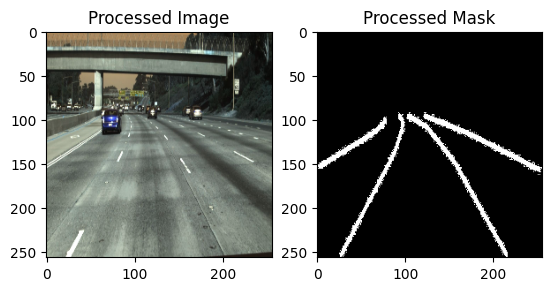

In [ ]:
test_image = cv2.imread(os.path.join(image_dir, os.listdir(image_dir)[0]))
test_mask = cv2.imread(os.path.join(mask_dir, os.listdir(mask_dir)[0]), cv2.IMREAD_GRAYSCALE)

processed_image, processed_mask = resize_and_normalize(test_image, test_mask)

# Visualize the processed image and mask
plt.subplot(1, 2, 1)
plt.imshow(processed_image)
plt.title("Processed Image")

plt.subplot(1, 2, 2)
plt.imshow(processed_mask, cmap='gray')
plt.title("Processed Mask")

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Split the preprocessed dataset
train_images, val_images, train_masks, val_masks = train_test_split(
    images, masks, test_size=0.2, random_state=42
)

# Confirm the shapes
print(f"Training Images: {train_images.shape}, Validation Images: {val_images.shape}")
print(f"Training Masks: {train_masks.shape}, Validation Masks: {val_masks.shape}")


Training Images: (2900, 256, 256, 3), Validation Images: (726, 256, 256, 3)
Training Masks: (2900, 256, 256), Validation Masks: (726, 256, 256)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

def build_unet(input_shape=(256, 256, 3)):
    inputs = Input(input_shape)

    # Downsampling path
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Upsampling path
    u6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs, outputs)
    return model

unet_model = build_unet()
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
unet_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_19 (Conv2D)        │ (None, 256, 256, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 64)   │              0 │ conv2d_19[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 128, 128, 64)   │              0 │ conv2d_20[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 128)  │              0 │ conv2d_21[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 64, 64, 128)    │              0 │ conv2d_22[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 256)    │              0 │ conv2d_23[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 64, 64, 256)    │        590,080 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 32, 32, 256)    │              0 │ conv2d_24[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 512)    │              0 │ conv2d_25[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 32, 32, 512)    │      2,359,808 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 16, 16, 512)    │              0 │ conv2d_26[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the U-Net model
history = unet_model.fit(
    train_images, train_masks,
    validation_data=(val_images, val_masks),
    batch_size=16,
    epochs=20
)


Epoch 1/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 41s 152ms/step - accuracy: 0.9571 - loss: 0.6817 - val_accuracy: 0.9572 - val_loss: 0.6903
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9569 - loss: 0.6952 - val_accuracy: 0.9572 - val_loss: 0.6903
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9570 - loss: 0.6925 - val_accuracy: 0.9572 - val_loss: 0.6903
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9569 - loss: 0.6942 - val_accuracy: 0.9572 - val_loss: 0.6903
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9570 - loss: 0.6926 - val_accuracy: 0.9572 - val_loss: 0.6903
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9571 - loss: 0.6920 - val_accuracy: 0.9572 - val_loss: 0.6903
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9571 - loss: 0.6919 - val_accuracy: 0.9572 - val_loss: 0.6903
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 17s 96ms/step - accuracy: 0.9571 - loss: 0.6920 -

In [ ]:
# Evaluate on validation data
val_loss, val_accuracy = unet_model.evaluate(val_images, val_masks)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9573 - loss: 0.6882
Validation Loss: 0.6903054118156433
Validation Accuracy: 0.9571720957756042


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


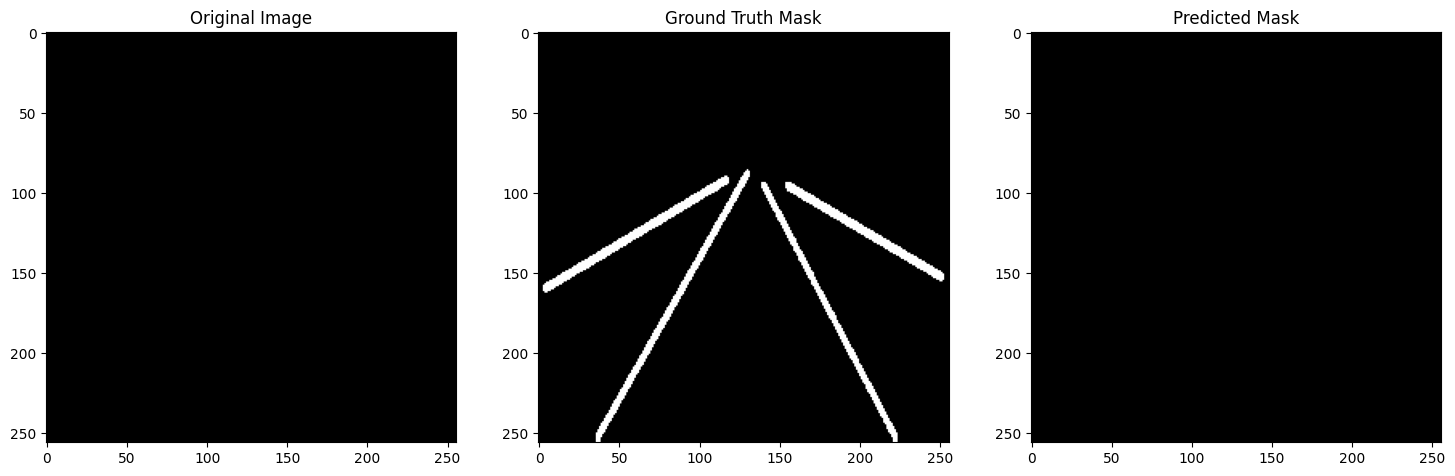

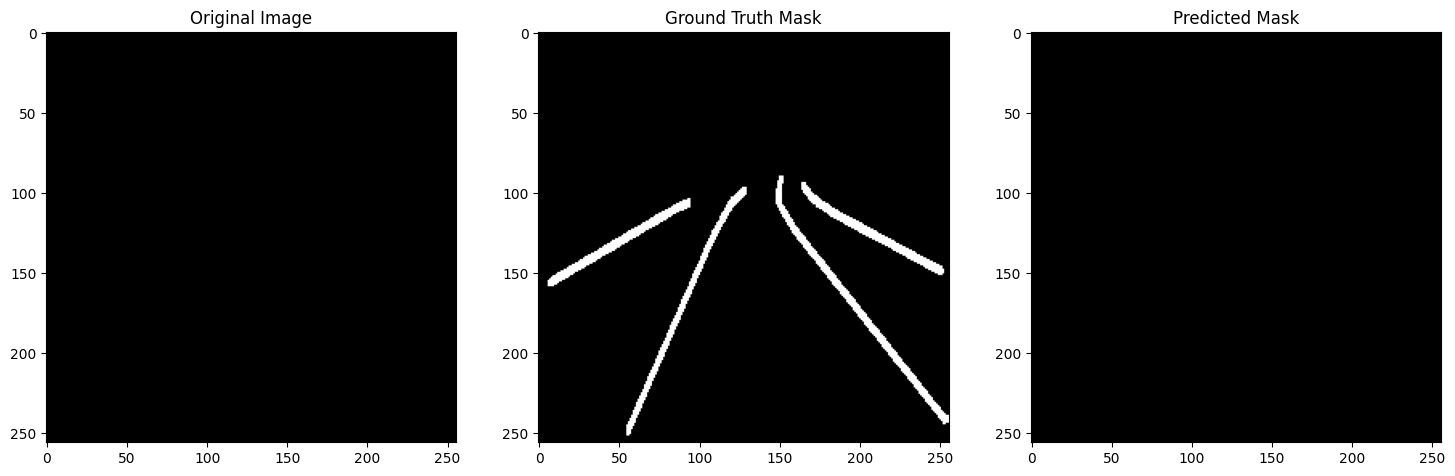

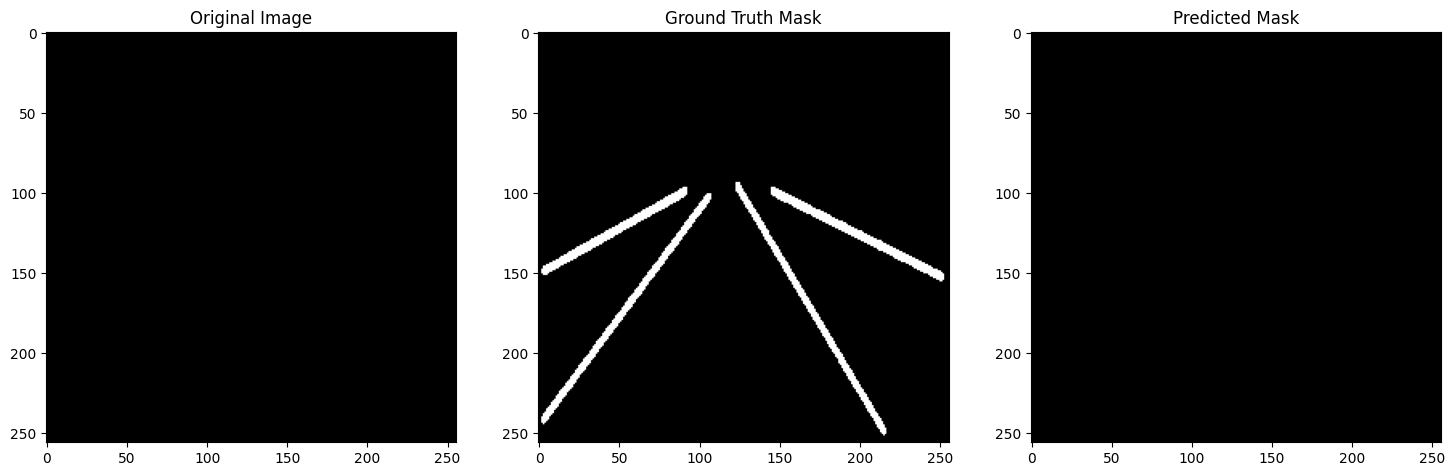

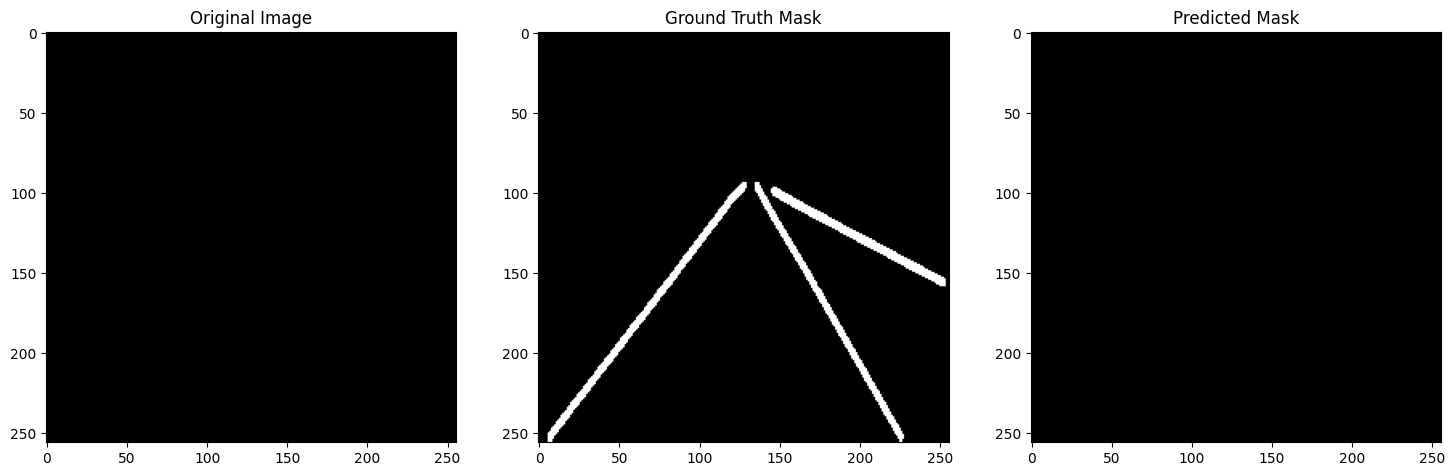

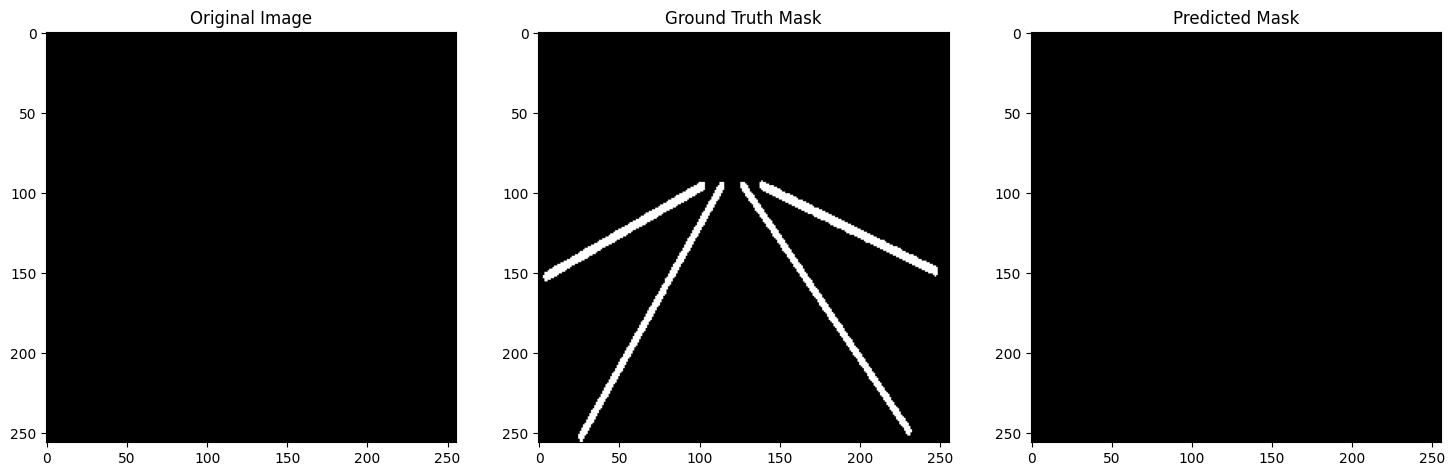

In [ ]:
# Predict on validation images
preds = unet_model.predict(val_images[:5])
preds = (preds > 0.5).astype(np.uint8)  # Binarize predictions

# Plot original image, ground truth, and predicted mask
for i in range(5):
    plt.figure(figsize=(18, 6))

    # Original image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(val_images[i])

    # Ground truth mask
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth Mask")
    plt.imshow(val_masks[i].squeeze(), cmap='gray')

    # Predicted mask
    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(preds[i].squeeze(), cmap='gray')

    plt.show()
